# The Discrete-Time Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Theorems

The theorems of the discrete-time Fourier transform (DTFT) relate basic operations applied to discrete signals to their equivalents in the DTFT domain. They are of use to transform signals composed from modified [standard signals](../discrete_signals/standard_signals.ipynb), for the computation of the response of a linear time-invariant (LTI) system and to predict the consequences of modifying a signal or system by certain operations.

### Convolution Theorem

The [convolution theorem](https://en.wikipedia.org/wiki/Convolution_theorem) states that the DTFT of the linear convolution of two discrete signals $x[k]$ and $y[k]$ is equal to the scalar multiplication of their DTFTs $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ and $Y(e^{j \Omega}) = \mathcal{F}_* \{ y[k] \}$

\begin{equation}
\mathcal{F}_* \{ x[k] * y[k] \} = X(e^{j \Omega}) \cdot Y(e^{j \Omega})
\end{equation}

The theorem can be proven by introducing the [definition of the linear convolution](../discrete_systems/linear_convolution.ipynb) into the [definition of the DTFT](definition.ipynb) and changing the order of summation

\begin{align}
\mathcal{F} \{ x[k] * y[k] \} &= \sum_{k = -\infty}^{\infty} \left( \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot y[k - \kappa] \right) e^{-j \Omega k}  \\
&= \sum_{\kappa = -\infty}^{\infty} \left( \sum_{k = -\infty}^{\infty} y[k - \kappa] \, e^{-j \Omega k} \right) x[\kappa] \\
&= Y(e^{j \Omega}) \cdot \sum_{\kappa = -\infty}^{\infty} x[\kappa] \, e^{-j \Omega \kappa} \\
&= Y(e^{j \Omega}) \cdot X(e^{j \Omega})
\end{align}

The convolution theorem is very useful in the context of LTI systems. The output signal $y[k]$ of an LTI system is given as the convolution of the input signal $x[k]$ with its impulse response $h[k]$. Hence, the signals and the system can be represented equivalently in the time and frequency domain

![Representation of an LTI system in the time- and spectral-domain](LTI_system.png)

Calculation of the system response by transforming the problem into the DTFT domain can be beneficial since this replaces the computation of the linear convolution by a scalar multiplication. The (inverse) DTFT is known for many signals or can be derived by applying the properties and theorems to standard signals and their transforms. In many cases this procedure simplifies the calculation of the system response significantly.

The convolution theorem can also be useful to derive the DTFT of a signal. The key is here to express the signal as convolution of two other signals for which the transforms are known. This is illustrated in the following example.

#### Transformation of the triangular signal

The linear convolution of two [rectangular signals](../discrete_signals/standard_signals.ipynb#Rectangular-Signal) of lengths $N$ and $M$ defines a [signal of trapezoidal shape](../discrete_systems/linear_convolution.ipynb#Finite-Length-Signals)

\begin{equation}
x[k] = \text{rect}_N[k] * \text{rect}_M[k]
\end{equation}

Application of the convolution theorem together with the [DTFT of the rectangular signal](definition.ipynb#Transformation-of-the-Rectangular-Signal) yields its DTFT as

\begin{equation}
X(e^{j \Omega}) = \mathcal{F}_* \{ \text{rect}_N[k] \} \cdot \mathcal{F}_* \{ \text{rect}_M[k] \} =
e^{-j \Omega \frac{N+M-2}{2}} \cdot \frac{\sin(\frac{N \Omega}{2}) \sin(\frac{M \Omega}{2})}{\sin^2 ( \frac{\Omega}{2} )}
\end{equation}

The transform of the triangular signal can be derived from this result. The convolution of two rectangular signals of equal length $N=M$ yields the triangular signal $\Lambda[k]$ of length $2N - 1$

\begin{equation}
\Lambda_{2N - 1}[k] = \begin{cases} k + 1 & \text{for } 0 \leq k < N \\
2N - 1 - k & \text{for } N \leq k < 2N - 1 \\
0 & \text{otherwise}
\end{cases}
\end{equation}

From above result the DTFT of the triangular signal is derived by substitution of $N$ by $M$

\begin{equation}
\mathcal{F}_* \{ \Lambda_{2N - 1}[k] \} =
e^{-j \Omega (N-1)} \cdot \frac{\sin^2(\frac{N \Omega}{2}) }{\sin^2 ( \frac{\Omega}{2} )}
\end{equation}

Both the signal and the magnitude of its DTFT are plotted for illustration

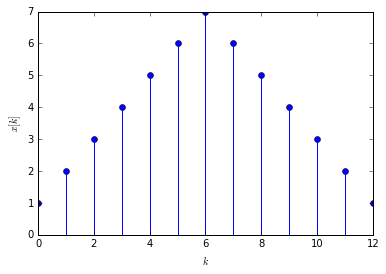

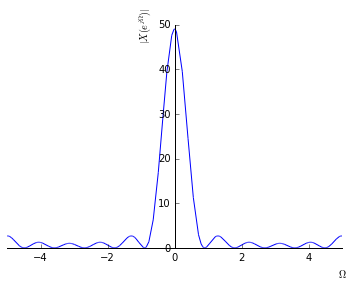

In [1]:
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

N = 7

x = np.convolve(np.ones(N), np.ones(N), mode='full')
plt.stem(x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')

W = sym.symbols('Omega')
X = sym.exp(-sym.I*W *(N-1)) * sym.sin(N*W/2)**2 / sym.sin(W/2)**2
sym.plot(sym.Abs(X), (W, -5, 5), xlabel='$\Omega$', ylabel='$|X(e^{j \Omega})|$');

**Exercise**

* Change the length of the triangular signal in above example. How does its DTFT change?
* The triangular signal introduced above is of odd length $2N - 1$
    * Define a triangular signal of even length by convolving two rectangular signals
    * Derive its DTFT
    * Compare the DTFTs of a triangular signal of odd/even length

### Shift Theorem

The [shift of a signal](../discrete_signals/operations.ipynb#Shift) $x[k]$ can be expressed by a convolution with a shifted Dirac impulse

\begin{equation}
x[k - \kappa] = x[k] * \delta[k - \kappa]
\end{equation}

for $\kappa \in \mathbb{Z}$. This follows from the sifting property of the Dirac impulse. Applying the DTFT to the left- and right-hand side and exploiting the convolution theorem yields

\begin{equation}
\mathcal{F}_* \{ x[k - \kappa] \} = X(e^{j \Omega}) \cdot e^{- j \Omega \kappa}
\end{equation}

where $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$. Note that $\mathcal{F}_* \{ \delta(k - \kappa) \} = e^{- j \Omega \kappa}$ can be derived from the definition of the DTFT together with the sifting property of the Dirac impulse. Above relation is known as shift theorem of the DTFT.

Expressing the DTFT $X(e^{j \Omega}) = |X(e^{j \Omega})| \cdot e^{j \varphi(e^{j \Omega})}$ by its absolute value $|X(e^{j \Omega})|$ and phase $\varphi(e^{j \Omega})$ results in

\begin{equation}
\mathcal{F}_* \{ x[k - \kappa] \} = | X(e^{j \Omega}) | \cdot e^{j (\varphi(e^{j \Omega}) - \Omega \kappa)}
\end{equation}

Shifting of a signal does not change the absolute value of its spectrum but it subtracts the linear contribution $\Omega \kappa$ from its phase.

### Multiplication Theorem

The transform of a multiplication of two signals $x[k] \cdot y[k]$ is derived by introducing the signals into the definition of the DTFT, expressing the signal $x[k]$ by its spectrum $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ and rearranging terms

\begin{align}
\mathcal{F}_* \{ x[k] \cdot y[k] \} &= \sum_{k=-\infty}^{\infty} x[k] \cdot y[k] \, e^{-j \Omega k} \\
&= \sum_{k=-\infty}^{\infty} \left( \frac{1}{2 \pi} \int_{-\pi}^{\pi} X(e^{j \nu}) \, e^{j \nu k} \; d \nu \right) y[k] \, e^{-j \Omega k} \\
&= \frac{1}{2 \pi} \int_{-\pi}^{\pi} X(e^{j \nu}) \sum_{k=-\infty}^{\infty} y[k] \, e^{-j (\Omega - \nu) k} \; d\nu \\
&= \frac{1}{2 \pi} \int_{-\pi}^{\pi} X(e^{j \nu}) \cdot Y(e^{j (\Omega - \nu)}) d\nu
\end{align}

where $Y(e^{j \Omega}) = \mathcal{F}_* \{ y[k] \}$.

The [periodic (cyclic/circular) convolution](https://en.wikipedia.org/wiki/Circular_convolution) of two aperiodic signals $h(t)$ and $g(t)$ is defined as

\begin{equation}
h(t) \circledast_{T} g(t) = \int_{-\infty}^{\infty} h(\tau) \cdot g_\text{p}(t - \tau) \; d\tau 
\end{equation}

where $T$ denotes the period of the convolution, $g_\text{p}(t) = \sum_{n=-\infty}^{\infty} g(t + n T)$ the periodic summation of $g(t)$ and $\tau \in \mathbb{R}$ an arbitrary constant. The periodic convolution is commonly abbreviated by $\circledast_{T}$. With $h_\text{p}(t)$ denoting the periodic summation of $h(t)$ the periodic convolution can be rewritten as

\begin{equation}
h(t) \circledast_{T} g(t) = \int_{\tau_0}^{\tau_0 + T} h_\text{p}(\tau) \cdot g_\text{p}(t - \tau) \; d\tau 
\end{equation}

where $\tau_0 \in \mathbb{R}$ denotes an arbitrary constant. The latter definition holds also for two [periodic signals](../periodic_signals/spectrum.ipynb) $h(t)$ and $g(t)$ with period $T$.

Comparison of the DTFT of two multiplied signals with the definition of the periodic convolution reveals that the preliminary result above can be expressed as

\begin{equation}
\mathcal{F}_* \{ x[k] \cdot y[k] \} = \frac{1}{2\pi} \, X(e^{j \Omega}) \circledast_{2 \pi} Y(e^{j \Omega}) 
\end{equation}

The DTFT of a multiplication of two signals $x[k] \cdot y[k]$ is given by the periodic convolution of their transforms $X(e^{j \Omega})$ and $Y(e^{j \Omega})$ weighted with $\frac{1}{2 \pi}$. The periodic convolution has a period of $T = 2 \pi$. Note, the convolution is performed with respect to the normalized angular frequency $\Omega$.

Applications of the multiplication theorem include the modulation and windowing of signals. The former leads to the modulation theorem introduced later, the latter is illustrated by the following example.

**Example**

Windowing of signals is used to derive signals of finite duration from signals of infinite duration or to truncate signals to a shorter length. The signal $x[k]$ is multiplied by a weighting function $w[k]$ in order to derive the finite length signal

\begin{equation}
y[k] = w[k] \cdot x[k]
\end{equation}

Application of the multiplication theorem yields the spectrum $Y(e^{j \Omega}) = \mathcal{F}_* \{ y[k] \}$ of the windowed signal as

\begin{equation}
Y(e^{j \Omega}) = \frac{1}{2 \pi} W(e^{j \Omega}) \circledast X(e^{j \Omega})
\end{equation}

where $W(e^{j \Omega}) = \mathcal{F}_* \{ w[k] \}$ and $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$. In order to illustrate the consequence of windowing, a cosine signal $x[k] = \cos(\Omega_0 k)$ is truncated to a finite length using a rectangular signal

\begin{equation}
y[k] = \text{rect}_N[k] \cdot \cos(\Omega_0 k)
\end{equation}

where $N$ denotes the length of the truncated signal and $\Omega_0$ its normalized angular frequency. Using the DTFT of the [rectangular signal](definition.ipynb#Transformation-of-the-Rectangular-Signal) and the [cosine signal](properties.ipynb#Transformation-of-the-cosine-and-sine-signal) yields

\begin{align}
Y(e^{j \Omega}) &= \frac{1}{2 \pi} e^{-j \Omega \frac{N-1}{2}} \cdot \frac{\sin \left(\frac{N \Omega}{2} \right)}{\sin \left( \frac{\Omega}{2} \right)} \circledast \frac{1}{2} \left[ {\bot \!\! \bot \!\! \bot} \left( \frac{\Omega + \Omega_0}{2 \pi} \right) + {\bot \!\! \bot \!\! \bot} \left( \frac{\Omega - \Omega_0}{2 \pi} \right) \right] \\
&= \frac{1}{2} \left[ e^{-j (\Omega+\Omega_0) \frac{N-1}{2}} \cdot \frac{\sin \left(\frac{N (\Omega+\Omega_0)}{2} \right)}{\sin \left( \frac{\Omega+\Omega_0}{2} \right)} + e^{-j (\Omega-\Omega_0) \frac{N-1}{2}} \cdot \frac{\sin \left(\frac{N (\Omega-\Omega_0)}{2} \right)}{\sin \left( \frac{\Omega-\Omega_0}{2} \right)} \right]
\end{align}

The latter identity results from the sifting property of the Dirac impulse and the periodicity of both spectra. The signal $y[k]$ and its magnitude spectrum $|Y(e^{j \Omega})|$ are plotted for specific values of $N$ and $\Omega_0$.

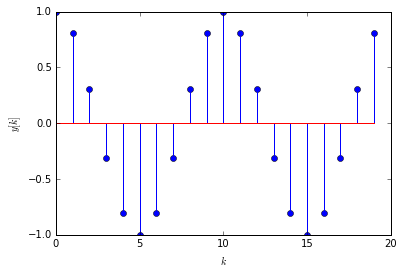

In [2]:
N = 20
W0 = 2*np.pi/10

k = np.arange(N)
x = np.cos(W0 * k)

plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$y[k]$');

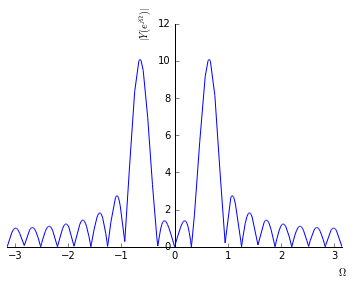

In [3]:
W = sym.symbols('Omega')

Y = 1/2 * ((sym.exp(-sym.I*(W+W0)*(N-1)/2) * sym.sin(N*(W+W0)/2) / sym.sin((W+W0)/2)) + 
           (sym.exp(-sym.I*(W-W0)*(N-1)/2) * sym.sin(N*(W-W0)/2) / sym.sin((W-W0)/2)))

sym.plot(sym.Abs(Y), (W, -sym.pi, sym.pi), xlabel='$\Omega$', ylabel='$|Y(e^{j \Omega})|$');

**Exercise**

* Change the length $N$ of the signal by modifying the example. How does the spectrum change if you decrease or increase the length?

* What happens if you change the normalized angular frequency $\Omega_0$ of the signal?

* Assume a signal that is composed from a superposition of two finite length cosine signals with different frequencies. What qualitative condition has to hold that you can derive these frequencies from inspection of the spectrum?

### Modulation Theorem

The complex modulation of a signal $x[k]$ is defined as $e^{j \Omega_0 k} \cdot x[k]$ with $\Omega_0 \in \mathbb{R}$. The DTFT of the modulated signal is derived by applying the multiplication theorem

\begin{equation}
\mathcal{F}_* \left\{ e^{j \Omega_0 k} \cdot x[k] \right\} = \frac{1}{2 \pi} \cdot {\bot \!\! \bot \!\! \bot}\left( \frac{\Omega - \Omega_0}{2 \pi} \right) \circledast X(e^{j \Omega}) 
= X \big( e^{j \, (\Omega - \Omega_0)} \big)
\end{equation}

where $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$.  Above result states that the complex modulation of a signal leads to a shift of its spectrum. This result is known as modulation theorem.

**Example**

An example for the application of the modulation theorem is the [downsampling/decimation](https://en.wikipedia.org/wiki/Decimation_(signal_processing) of a discrete signal $x[k]$. Downsampling refers to lowering the sampling rate of a signal. The example focuses on the special case of removing every second sample, hence halving the sampling rate. The downsampling is modeled by defining a signal $x_\frac{1}{2}[k]$ where every second sample is set to zero

\begin{equation}
x_\frac{1}{2}[k] = \begin{cases} 
x[k] & \text{for even } k \\
0 & \text{for odd } k
\end{cases}
\end{equation}

In order to derive the spectrum $X_\frac{1}{2}(e^{j \Omega}) = \mathcal{F}_* \{ x_\frac{1}{2}[k] \}$, the signal $u[k]$ is introduced where every second sample is zero

\begin{equation}
u[k] = \frac{1}{2} ( 1 + e^{j \pi k} ) = \begin{cases} 1 & \text{for even } k \\
0 & \text{for odd } k \end{cases}
\end{equation}

Using $u[k]$, the process of setting every second sample of $x[k]$ to zero can be expressed as

\begin{equation}
x_\frac{1}{2}[k] = u[k] \cdot x[k]
\end{equation}

Now the spectrum $X_\frac{1}{2}(e^{j \Omega})$ is derived by applying the multiplication theorem and introducing the [DTFT of the exponential signal](definition.ipynb#Transformation-of-the-Exponential-Signal). This results in

\begin{equation}
X_\frac{1}{2}(e^{j \Omega}) = \frac{1}{4 \pi} \left(  {\bot \!\! \bot \!\! \bot}\left( \frac{\Omega}{2 \pi} \right) + 
{\bot \!\! \bot \!\! \bot}\left( \frac{\Omega - \pi}{2 \pi} \right) \right) \circledast X(e^{j \Omega}) =
\frac{1}{2} X(e^{j \Omega}) + \frac{1}{2} X(e^{j (\Omega- \pi)})
\end{equation}

where $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$. The spectrum $X_\frac{1}{2}(e^{j \Omega})$ consists of the spectrum of the original signal $X(e^{j \Omega})$ superimposed by the shifted spectrum $X(e^{j (\Omega- \pi)})$ of the original signal. This may lead to overlaps that constitute aliasing. In order to avoid aliasing, the spectrum of the signal $x[k]$ has to be band-limited to $-\frac{\pi}{2} < \Omega < \frac{\pi}{2}$ before downsampling.

### Parseval's Theorem

[Parseval's theorem](https://en.wikipedia.org/wiki/Parseval's_theorem) relates the energy of a discrete signal to its spectrum. The squared absolute value of a signal $x[k]$ represents its instantaneous power. It can be expressed as

\begin{equation}
| x[k] |^2 = x[k] \cdot x^*[k]
\end{equation}

where $x^*[k]$ denotes the complex conjugate of $x[k]$. Transformation of the right-hand side and application of the multiplication theorem results in

\begin{equation}
\mathcal{F}_* \{ x[k] \cdot x^*[k] \} = \frac{1}{2 \pi} \cdot X(e^{j \Omega}) \circledast_{2 \pi} X^*(e^{-j \Omega})
\end{equation}

Introducing the definition of the DTFT and the periodic convolution

\begin{equation}
\sum_{k = -\infty}^{\infty} x[k] \cdot x^*[k] \, e^{-j \Omega k}  =
\frac{1}{2 \pi} \int_{-\pi}^{\pi} X(e^{j \nu}) \cdot X^*(e^{j (\Omega - \nu)}) \; d\nu
\end{equation}

Setting $\Omega = 0$ followed by the substitution $\nu = \Omega$ yields Parseval's theorem

\begin{equation}
\sum_{k = -\infty}^{\infty} | x[k] |^2 = \frac{1}{2 \pi} \int_{-\pi}^{\pi} | X(e^{j \Omega}) |^2 \; d\Omega
\end{equation}

The sum over the samples of the squared absolute signal is equal to the integral over its squared absolute spectrum divided by $2 \pi$. Since the left-hand side represents the energy $E$ of the signal $x[k]$, Parseval's theorem states that the energy can be computed alternatively in the spectral domain by integrating over the squared absolute value of the spectrum.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.